# ML Clustering Assignment

*Prafful Agrawal*  
*17/02/2021*

### Problem Statement

Compress the gray scale racoon image (available in the *scipy* package) into 5 clusters. Also, visualize both the raw and the compressed images and look for quality difference.

### Solution

Let us import the required packages.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

Now, load the image data.

In [2]:
from scipy.misc import face
face = face(gray = True)
face

array([[114, 130, 145, ..., 119, 129, 137],
       [ 83, 104, 123, ..., 118, 134, 146],
       [ 68,  88, 109, ..., 119, 134, 145],
       ...,
       [ 98, 103, 116, ..., 144, 143, 143],
       [ 94, 104, 120, ..., 143, 142, 142],
       [ 94, 106, 119, ..., 142, 141, 140]], dtype=uint8)

Let us fit a *K-means clustering* model to the image data.

In [3]:
X = face.reshape(-1, 1)
k_means = KMeans(n_clusters = 5, random_state = 123)
k_means.fit(X)

KMeans(n_clusters=5, random_state=123)

Check the cluster centers.

In [4]:
k_means.cluster_centers_

array([[194.79152399],
       [114.52967094],
       [ 27.11166441],
       [153.77831282],
       [ 74.49141876]])

We will map these center values to the corresponding data points according to their cluster labels.

In [5]:
# Function to map the cluster centers
map_labels = lambda i: k_means.cluster_centers_[i]
face_compressed = map_labels(k_means.labels_)
face_compressed

array([[114.52967094],
       [114.52967094],
       [153.77831282],
       ...,
       [153.77831282],
       [153.77831282],
       [153.77831282]])

Reshape the compressed data to the original dimensions.

In [6]:
face_compressed.shape = face.shape
face_compressed

array([[114.52967094, 114.52967094, 153.77831282, ..., 114.52967094,
        114.52967094, 153.77831282],
       [ 74.49141876, 114.52967094, 114.52967094, ..., 114.52967094,
        114.52967094, 153.77831282],
       [ 74.49141876,  74.49141876, 114.52967094, ..., 114.52967094,
        114.52967094, 153.77831282],
       ...,
       [114.52967094, 114.52967094, 114.52967094, ..., 153.77831282,
        153.77831282, 153.77831282],
       [ 74.49141876, 114.52967094, 114.52967094, ..., 153.77831282,
        153.77831282, 153.77831282],
       [ 74.49141876, 114.52967094, 114.52967094, ..., 153.77831282,
        153.77831282, 153.77831282]])

Visualize both the raw and the compressed images. 

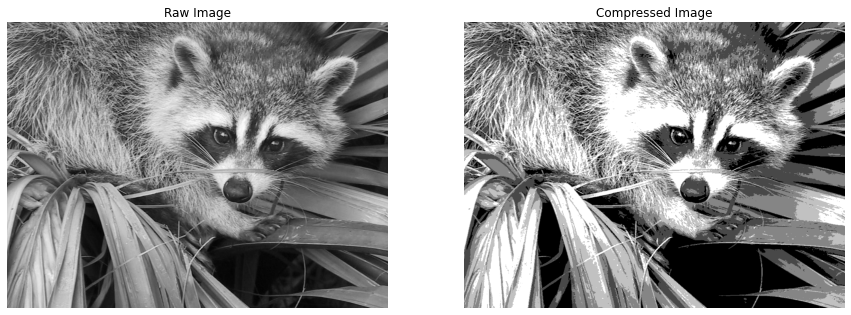

In [7]:
plt.figure(figsize=(15, 10))
# Raw Image
plt.subplot(121)
plt.imshow(face, cmap = 'gray', vmin = face.min(), vmax = face.max())
plt.title('Raw Image')
plt.axis('off')
# Compressed Image
plt.subplot(122)
plt.imshow(face_compressed, cmap = 'gray', vmin = face_compressed.min(), vmax = face_compressed.max())
plt.title('Compressed Image')
plt.axis('off')
plt.show()